# 第17节课: 可视化入门 —— 让数据"被看见"

**目标**: 掌握 Pandas 绘图基础，绘制柱状图、条形图和饼图。
**数据**: `data/china_tourism.csv`

## 1. 环境搭建与数据加载

我们不需要死记硬背 `read_csv` 的语法。直接告诉 AI 你的文件在哪里，让它帮你写代码。

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 

# 读取数据
# 请确保数据文件放在当前目录下的 data 文件夹中
df = pd.read_csv('data/china_tourism.csv')

# 检查前5行
print(df.head())

  City                                            名字  \
0   定西                                         岳麓山公园   
1   定西                                           遮阳山   
2   定西  贵清山旅游风景区Guiqing Mountain Tourism Scenic Area   
3   定西                               定西玉湖公园Yuhu Park   
4   定西                                           莲峰山   

                                                  链接  \
0  http://travel.qunar.com/p-oi716510-yuelushango...   
1     http://travel.qunar.com/p-oi708752-zheyangshan   
2  http://travel.qunar.com/p-oi714756-guiqingshan...   
3  http://travel.qunar.com/p-oi708997-dingxiyuhug...   
4    http://travel.qunar.com/p-oi705920-lianfengshan   

                                                  地址  \
0                            \n\n地址:\n甘肃-定西　-临洮县\n\n   
1                                                NaN   
2    \n\n地址:\n定西市漳县新寺镇青瓦寺村\n\n\n电话:\n18209322881\n\n   
3  \n\n地址:\n永定西路67号西侧100米\n\n\n电话:\n+86 932 826 1...   
4                                             

## 2. ⚠️ 技术贴士：中文显示的本地化配置

Python 绘图库默认不支持中文，直接画图会显示为方块 (□□□)。
这是通用的**"标准配置"**，**无需理解原理**，建议将此段配置保存，**每次画图前复制粘贴**即可。

In [8]:
# --- 解决中文乱码的标准配置 ---

# 设置中文字体 (自动适配 Windows/Mac)
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS'] 

# 解决负号显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False 

## 3. 核心任务一：旅游资源分布分析 (计数与柱状图)

**场景**: 暑假想带孩子去一个景点**最密集**的地方，优化交通时间成本。
**任务**: 统计 `City` 列中，各个城市出现的次数，取前 10 名画柱状图。

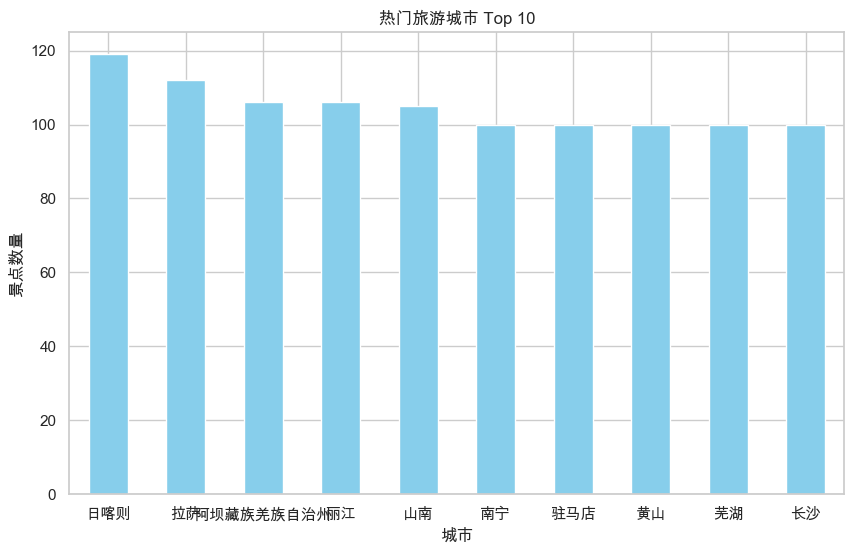

In [9]:
# 1. 统计 + 排序 + 取前10
# value_counts() 自动按数量降序排列
top_cities = df['City'].value_counts().head(10)

# 2. 画图 (kind='bar')
# figsize=(10, 6) 控制图片大小
# rot=0 让x轴标签横向显示，提升阅读体验
top_cities.plot(kind='bar', figsize=(10, 6), 
                color='skyblue', rot=0)

plt.title('热门旅游城市 Top 10')
plt.xlabel('城市')
plt.ylabel('景点数量')
plt.show()

## 4. 核心任务二：旅游成本分析 (分组与聚合)

**场景**: 预算有限，希望识别门票价格较高的城市，进行规避。
**任务**: 按城市分组 (`groupby`)，计算每个城市的**平均价格**，画出横向柱状图。

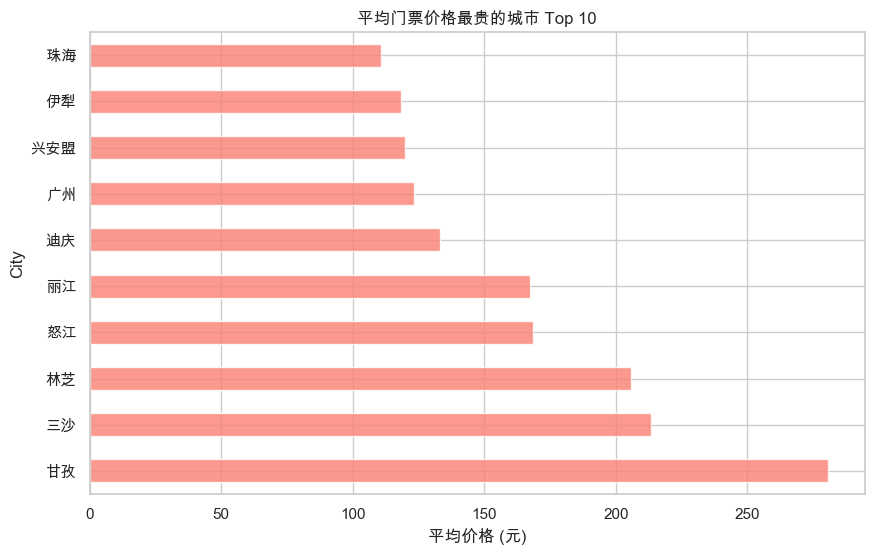

In [10]:
# 1. 分组 -> 计算平均值 -> 排序 -> 取前10
# groupby('City'): 按城市分组
# ['Sold_Price'].mean(): 计算价格平均值
# 使用括号来换行，避免使用反斜杠
expensive_cities = (df.groupby('City')['Sold_Price'].mean()
                     .sort_values(ascending=False).head(10))

# 2. 画横向柱状图 (kind='barh')
# alpha=0.8 设置透明度，视觉效果更柔和
# barh (Horizontal Bar) 特别适合长标签（如城市名）的展示
expensive_cities.plot(kind='barh', figsize=(10, 6), color='salmon', alpha=0.8)

plt.title('平均门票价格最贵的城市 Top 10')
plt.xlabel('平均价格 (元)')
plt.show()

## 5. 课堂练习：等级大比拼

**任务**: 统计全国 **5A、4A、3A** 景区各有多少个，并画一个 **饼图 (Pie Chart)** 来展示比例。

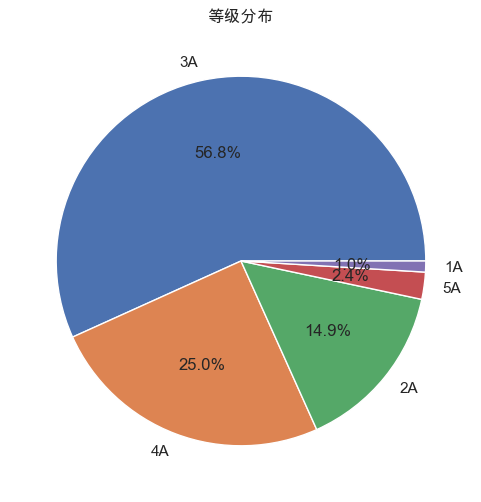

In [11]:
# 1. 统计
level_counts = df['Level'].value_counts()

# 2. 画饼图 (kind='pie')
# autopct='%1.1f%%' 显示百分比
level_counts.plot(kind='pie', figsize=(6, 6), 
                  autopct='%1.1f%%', title='等级分布')
plt.ylabel('') # 去掉Y轴标签更美观
plt.show()

# 第18节课: 可视化分析 —— 数据背后的洞察

**目标**: 从“看结果”进阶到“找关系”，验证假设。
**工具**: 散点图 (Scatter)、直方图 (Hist)、箱线图 (Boxplot)。

In [12]:
# 导入库并进行标准配置（防止中文乱码）
import pandas as pd
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False 

# 读取数据
df = pd.read_csv('data/china_tourism.csv')

## 1. 任务一：价格 vs 评分 (散点图实战)

**思考**：门票越贵的景区，评分就应该越高吗？
我们在一张图上把所有 **3000多个** 收费景点都画出来，看看它们是排成一条线（有关系），还是散落一地（没关系）。

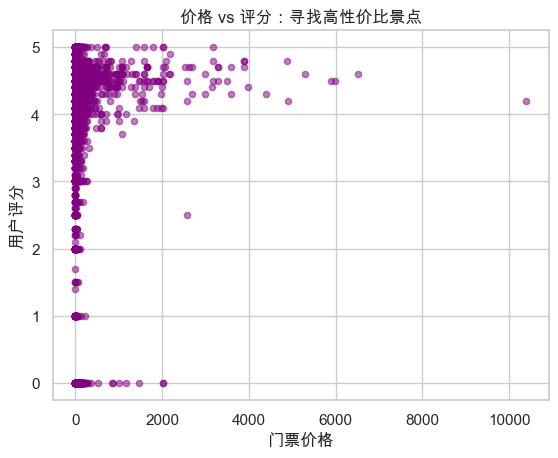

In [13]:
# kind='scatter' 表示散点图
# alpha=0.5 让重叠的点颜色变深，方便观察密度
# 注意：数据源中的评分为 'Rating_Clean'，名字为 '名字'
df.plot(kind='scatter', x='Sold_Price', y='Rating_Clean', 
        alpha=0.5, color='purple')

plt.title('价格 vs 评分：寻找高性价比景点')
plt.xlabel('门票价格')
plt.ylabel('用户评分')
plt.grid(True) # 加网格更好看
plt.show()

### 侦探时刻：你看到了什么？

*   **直觉预期**: 点应该均匀分布，或者排成一条线。
*   **实际看到的**: 
    1.  **图形畸形**: 大部分点都挤在左边一条狭长的区域里。
    2.  **右侧空旷**: 极少数几个点跑到了最右边（价格极高）。
    3.  **底部堆积**: 有很多评分为 0 的点。

**初步判断**: 这张图 **“生病了”**！异常值（天价）和无效值（0分）严重干扰了我们的视线。

## 2. 优化迭代：清洗后再看真相

**清洗策略**：为了分析**“付费景点的性价比”**，我们需要做三件事：
1.  **去天价**: 过滤价格 > 1000 的高端套餐。
2.  **去杂项**: 过滤价格 < 10 的电子导览/代金券。
3.  **去零分**: 过滤评分 = 0 的景点（暂无评分）。

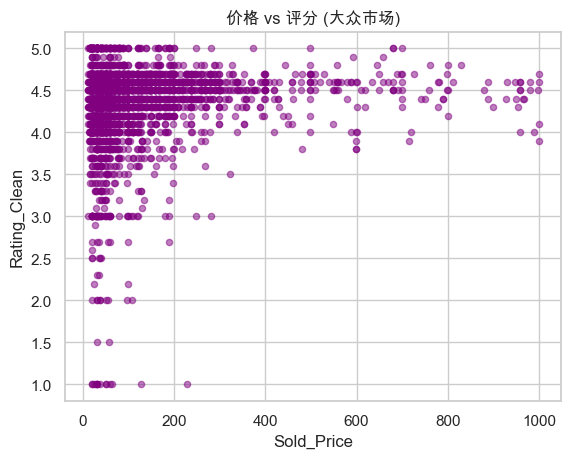

In [14]:
# 多条件筛选：保留 有评分、收费合理(10-1000元)的景点
df_filtered = df[
    (df['Rating_Clean'] > 0) & 
    (df['Sold_Price'] > 10) & 
    (df['Sold_Price'] < 1000)
]

df_filtered.plot(kind='scatter', 
                 x='Sold_Price', y='Rating_Clean', 
                 alpha=0.5, color='purple')
plt.title('价格 vs 评分 (大众市场)')
plt.show()

### 现在的真相：复杂的关系

清洗后的图揭示了更有趣的市场规律：
1.  **低价区 (0-200元)**：**良莠不齐**。既有高分宝藏，也有低分雷区。选低价需“慧眼”。
2.  **中高价区 (200-800元)**：**品质收敛**。低分点消失，分数集中在高分段。**花钱能买到“下限保障”**。
3.  **高价区 (>800元)**：**边际效应**。价格再高，评分未线性上升，反而因用户高期待而略有回落。

## 3. 任务二：寻找“高性价比标杆” (多条件筛选)

既然图上有“宝藏区”（左上角），怎么把它们的名字找出来？
条件：`Rating_Clean` 大于等于 4.8 **且** `Sold_Price` 在 **50 到 200** 之间 (大众消费主力区)。

请列出这些景点的名字、城市和价格，按**评分从高到低**排序。

In [15]:
# 两个条件中间用 & 连接
# 重要：每个条件必须加括号 ()，这是语法硬性规定
bargain_spots = df[ 
    (df['Rating_Clean'] >= 4.8) & 
    (df['Sold_Price'] >= 50) & 
    (df['Sold_Price'] <= 200)
]

# 排序并显示前10名
# 使用括号换行，避免反斜杠问题
print(bargain_spots.sort_values('Rating_Clean', ascending=False) \
      [['名字', 'City', 'Sold_Price', 'Rating_Clean']].head(10))

                                                 名字 City  Sold_Price  \
113                                         九泷十八滩漂流   韶关       138.0   
15526  云丘山玉皇顶索道Yunqiu Mountain Yuhuang Peak Ropeway   临汾        70.0   
23028                                         向日葵基地   广安       188.0   
23004                                           仙鹤洞   广安        86.0   
21676                                       武进太湖湾景区   常州        60.0   
19222                   阳泉海洋世界Yangquanhaiyang World   阳泉        78.0   
18832                                     月亮湾·金钟山景区   雅安        60.0   
17914                                       抚顺苏子河漂流   抚顺        73.0   
16060                                            花山   南宁        80.0   
15040                         石龙大峡谷Shilongda Canyon   梧州        50.0   

       Rating_Clean  
113             5.0  
15526           5.0  
23028           5.0  
23004           5.0  
21676           5.0  
19222           5.0  
18832           5.0  
17914           5.0  
16060    

> **💡 思考**：有些景点虽然是 5.0 分，但可能非常小众（评分人数少），存在偶然性。在进阶分析中，通常需要引入 **“评论数”** 作为置信度门槛。

## 4. 任务三：评分是否存在偏态分布？(直方图)

我想看看**大部分景点的评分**到底在哪个区间？是否存在“评分通胀”？

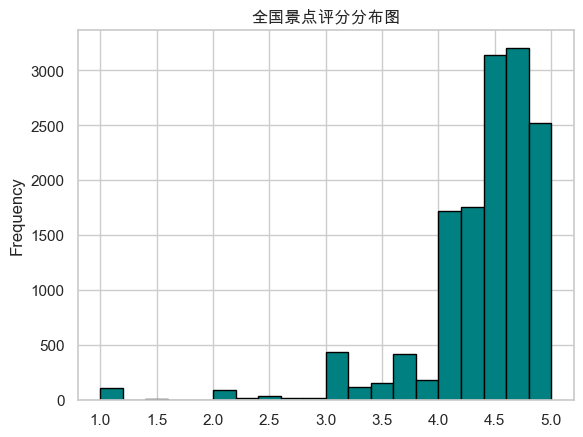

In [16]:
# kind='hist' 表示直方图
# bins=20 表示将数据切成20份
# 过滤掉0分（无评分）的数据
df[df['Rating_Clean'] > 0]['Rating_Clean'].plot(
    kind='hist', bins=20, 
    color='teal', edgecolor='black'
)

plt.title('全国景点评分分布图')
plt.show()

**结论**: 图像严重左偏，绝大多数评分都在 4.0 - 5.0 之间。这证实了“评分通胀”的存在。

## 5. 任务四：深入对比：5A真的比4A贵吗？(箱线图)

我们想对比不同等级景区的价格分布。看看 5A 景区是不是整体都比 4A 贵？

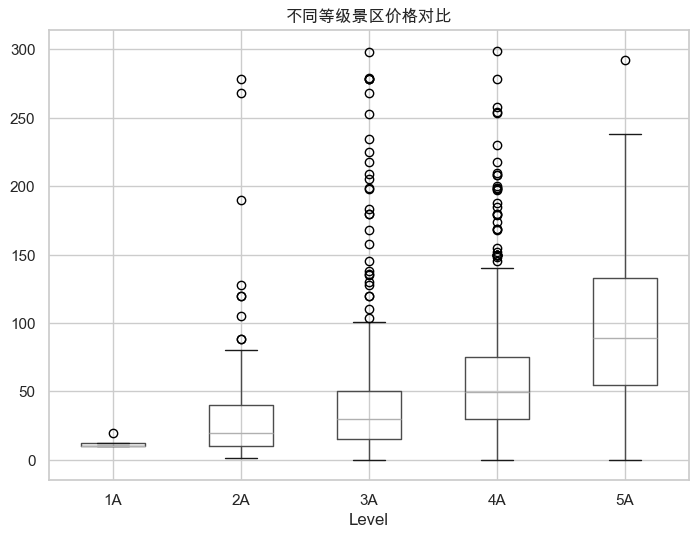

In [17]:
# 箱线图 (kind='box')
# by='Level': 按等级分组画箱子
# column='Sold_Price': 画价格的箱子
# 过滤掉极端高价(>300)和免费(0)的数据，只看收费景点的分布
df_paid = df[(df['Sold_Price'] < 300) & (df['Sold_Price'] > 0)]

df_paid.boxplot(
    by='Level', 
    column='Sold_Price', 
    figsize=(8, 6)
)

plt.title('不同等级景区价格对比')
plt.suptitle('') # 去掉默认生成的标题
plt.show()

### 结论：等级即溢价

*   **阶梯式上升**: 从 1A 到 5A，箱子的位置（绿色中位数线）明显呈**台阶式上升**。
*   **5A的溢价**: 5A 景区的箱体明显高于其他等级。
*   **洞察**: 虽然“评分”和“价格”没关系，但**“官方等级”和“价格”呈现显著的正相关**。5A 是高价门票的硬通货。

## 6. 任务五：景区等级越高体验越好吗？

**思考**：既然 5A 景区那么贵，那它们的体验（评分）真的比 4A、3A 更好吗？
我们来控制变量，只看 **200-800元** 这个“中高消费”区间，看看不同等级景区的评分表现。

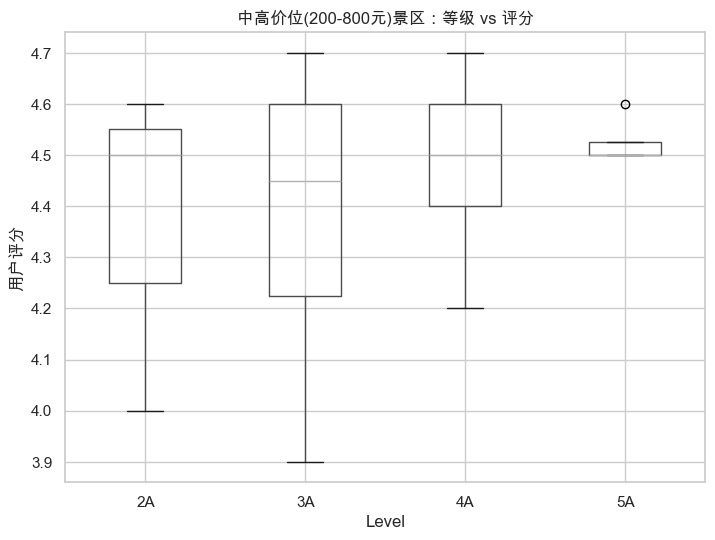

In [18]:
# 1. 筛选中高价位数据
df_mid_high = df[(df['Sold_Price'] >= 200) & 
                 (df['Sold_Price'] <= 800) &
                 (df['Rating_Clean'] > 0)]

# 2. 绘制箱线图：等级 vs 评分
df_mid_high.boxplot(
    by='Level', 
    column='Rating_Clean', 
    figsize=(8, 6)
)

plt.title('中高价位(200-800元)景区：等级 vs 评分')
plt.suptitle('')
plt.ylabel('用户评分')
plt.show()

### 任务五结果：破解等级迷思

1.  **评分趋同**: 在 200-800 元区间，2A/3A/4A 的中位数与 5A **差异极小**。只要钱花到位了，体验通常都不差。
2.  **5A的价值**: 5A 的箱体极扁（方差小），说明**品质极度稳定**。选 5A 不一定最惊喜，但绝对**不踩雷**。
3.  **低A的机会**: 2A/3A 虽然波动大，但上限很高。同等高价下，它们往往是**特色鲜明的小众精品**。

# 第19节课: 高阶可视化 —— 不仅要准，还要美

**目标**: 引入 **Seaborn** 库，升级图表美学，绘制小提琴图和成对关系图。
**重点**: 体验“声明式绘图”的便捷。

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 设置一个好看的主题 (Seaborn 特有)
# 使用 rc 参数配置字体，防止被 set_theme 重置
sns.set_theme(style="whitegrid", rc={
    'font.sans-serif': ['SimHei', 'Arial Unicode MS', 'sans-serif'],
    'axes.unicode_minus': False
})

# 读取数据
df = pd.read_csv('data/china_tourism.csv')

## 1. 美学升级：Seaborn 小提琴图

箱线图只能看中位数，看不到分布形状。**小提琴图 (Violin Plot)** = 箱线图 + 直方图。既能看“胖瘦”（分布），又能看“高低”（价格）。

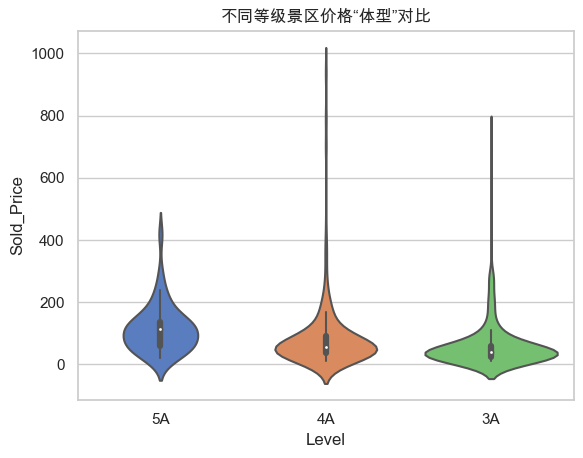

In [20]:
# 1. 过滤异常值（去掉价格 > 1000 的极端值）
df_clean = df[(df['Sold_Price'] < 1000) & 
              (df['Sold_Price'] > 10)]

# 2. 画图
# x, y: 指定横纵轴
# order: 指定X轴的排列顺序
# palette: 指定配色方案
sns.violinplot(data=df_clean, 
               x='Level', y='Sold_Price', 
               order=['5A', '4A', '3A'], 
               palette='muted')

plt.title('不同等级景区价格“体型”对比')
plt.show()

## 2. 全局概览：成对关系图 (PairPlot)

我们想看：“价格、评分、等级这三个变量之间，到底有什么错综复杂的关系？”
**PairPlot** 可以一行代码画出所有关系，是数据分析师的“全局概览”工具。

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


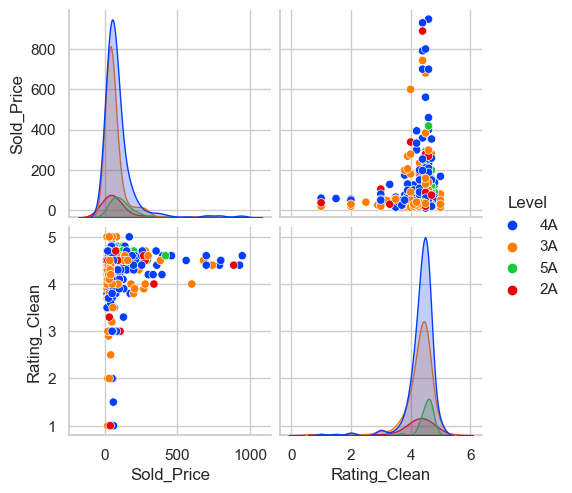

In [ ]:
# vars: 指定要分析的变量
# hue: 指定分类变量，不同类别会染成不同颜色
# 1. 准备数据：过滤掉评分=0的记录
df_pair = df_clean[df_clean['Rating_Clean'] > 0]

# 2. 绘制成对关系图
# hue='Level': 按照等级着色 (5A=蓝, 4A=橙...)
sns.pairplot(df_pair, 
             vars=['Sold_Price', 'Rating_Clean'], 
             hue='Level',
             height=3)
plt.show()

## 3. 课堂练习：相关系数热力图

PairPlot 让我们看到了关系，现在我们用**相关系数 (Correlation)** 来量化这种关系。

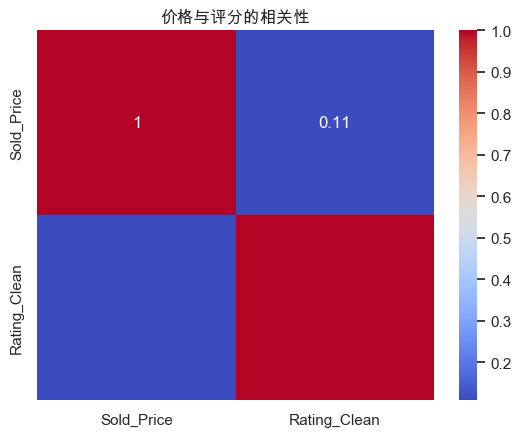

In [6]:
# 1. 计算相关系数矩阵
corr_matrix = df_pair[['Sold_Price', 'Rating_Clean']].corr()

# 2. 画热力图
# annot=True: 在格子里显示数值
# cmap='coolwarm': 使用冷暖色调（红正蓝负）
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('价格与评分的相关性')
plt.show()

## 4. 综合案例演示：江西省全景报告

这里将演示如何把柱状图、散点图、小提琴图等“积木”组合起来，为一个省份（以 **江西省** 为例）制作一份全方位的“体检报告”。

**分析目标 (3D View)**
1.  **资源 (Quantity)**: A 级景区结构是怎样的？
2.  **消费 (Cost)**: 门票价格分布如何？
3.  **口碑 (Value)**: 性价比如何？

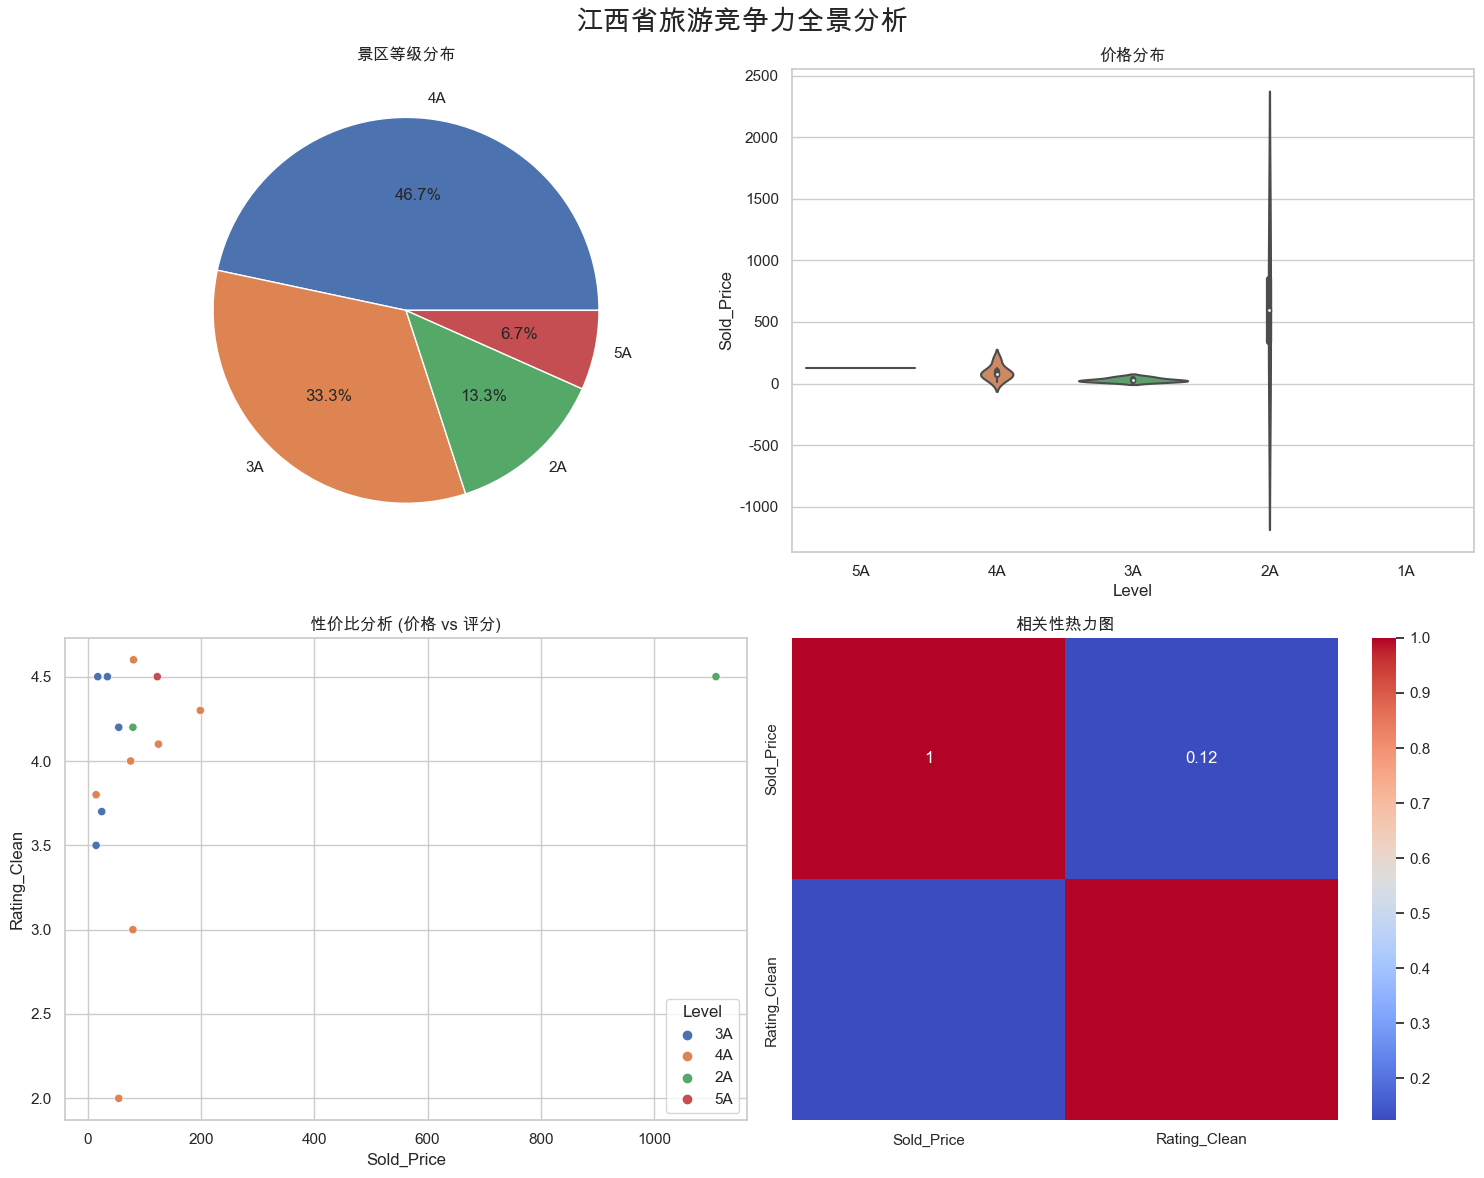

In [2]:
# 1. 数据准备 (江西11地市)
jiangxi_cities = ['南昌', '九江', '景德镇', '上饶', '赣州', 
                  '宜春', '吉安', '抚州', '萍乡', '新余', '鹰潭']
# 筛选并清洗数据
df_jx = df[df['City'].isin(jiangxi_cities) & 
           (df['Sold_Price'] > 10) & 
           (df['Rating_Clean'] > 0)]

# 2. 创建画布
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 3. 绘制子图
# 左上：饼图
df_jx['Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0,0])
axes[0,0].set_ylabel('')
axes[0,0].set_title('景区等级分布')

# 右上：小提琴图 (确保包含所有等级)
sns.violinplot(data=df_jx, x='Level', y='Sold_Price', 
               order=['5A','4A','3A','2A','1A'], ax=axes[0,1])
axes[0,1].set_title('价格分布')

# 下方：散点图
sns.scatterplot(data=df_jx, x='Sold_Price', y='Rating_Clean', 
                hue='Level', ax=axes[1,0])
axes[1,0].set_title('性价比分析 (价格 vs 评分)')

# 右下：热力图
sns.heatmap(df_jx[['Sold_Price', 'Rating_Clean']].corr(), 
            annot=True, cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('相关性热力图')

# 4. 调整布局
plt.suptitle('江西省旅游竞争力全景分析', fontsize=20)
plt.tight_layout()
plt.show()

# 第20节课: 实战工作坊 —— 我的第一份数据报告

**任务目标**：基于 `china_tourism.csv` 数据集，选择一个**非江西省**的目标省份（如四川、浙江、云南等），独立制作一份分析报告。

## Step 1: 选题与探查

你需要知道你的目标省份有哪些城市在数据里。
先查看所有城市，然后手动挑选属于你目标省份的城市。

In [ ]:
# 查看所有城市
print(df['City'].unique())

## Step 2: 实战编码

请模仿江西案例，将 `my_cities` 替换为你选定的城市列表，然后绘制图表。

In [ ]:
# 1. 定义你的城市列表 (在此处填入你选择的城市)
my_cities = ['成都', '乐山', '阿坝', '甘孜', '绵阳', '广元'] # <--- 修改这里
df_my_province = df[df['City'].isin(my_cities)]

# 2. 创建画布
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 3. 绘制子图 (请参考上一节课的代码自行补充)
# ...

# 4. 展示
plt.suptitle('XX旅游分析报告', fontsize=20) # <--- 修改标题
plt.tight_layout()
plt.show()